In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Loading the dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/Wholesale customers data.csv")

Displaying the first five rows of the dataset

In [ ]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Displaying the last five rows of the dataset

In [ ]:
df.tail()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125
439,1,3,2787,1698,2510,65,477,52


In [ ]:
df.isna()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
435,False,False,False,False,False,False,False,False
436,False,False,False,False,False,False,False,False
437,False,False,False,False,False,False,False,False
438,False,False,False,False,False,False,False,False


In [ ]:
df.shape

(440, 8)

In [ ]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [ ]:
df.drop('Channel',axis=1,inplace=True)

In [ ]:
df.drop('Region',axis=1,inplace=True)

In [ ]:
df.head(10)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
5,9413,8259,5126,666,1795,1451
6,12126,3199,6975,480,3140,545
7,7579,4956,9426,1669,3321,2566
8,5963,3648,6192,425,1716,750
9,6006,11093,18881,1159,7425,2098


Check to see if there are any Null Values, If yes then you need to fill them or remove them based on the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Delicassen        440 non-null    int64
dtypes: int64(6)
memory usage: 20.8 KB


As there are no null values check to see is there any duplicates

In [ ]:
df.duplicated().sum()

0

Let us describe the dataset and transpose it for easy visualisation

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0



Remove the Outliers

In [ ]:
from scipy import stats
import numpy as np
numerical_cols = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']
z_scores = np.abs(stats.zscore(df[numerical_cols]))
threshold = 3
outliers = (z_scores > threshold).any(axis=1)
df_no_outliers = df[~outliers]

In [ ]:
df_no_outliers.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Fresh,414.0,10711.758454,9819.217756,3.0,3063.25,8040.0,15657.00,49063.0
Milk,414.0,4871.920290,4555.665546,55.0,1477.75,3530.0,6908.50,25862.0
Grocery,414.0,6814.043478,6456.160715,3.0,2116.00,4528.0,9762.25,34792.0
Frozen,414.0,2549.898551,2916.683284,25.0,676.75,1447.0,3204.25,16919.0
Detergents_Paper,414.0,2373.393720,3208.707909,3.0,252.75,772.0,3660.50,17120.0
Delicassen,414.0,1237.939614,1217.399162,3.0,395.00,881.0,1681.75,7844.0


In [ ]:
df_no_outliers.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


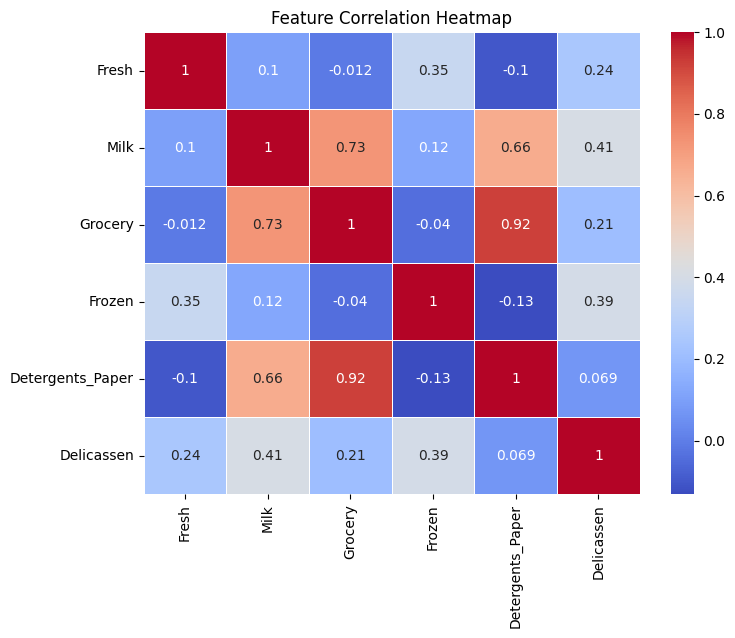

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

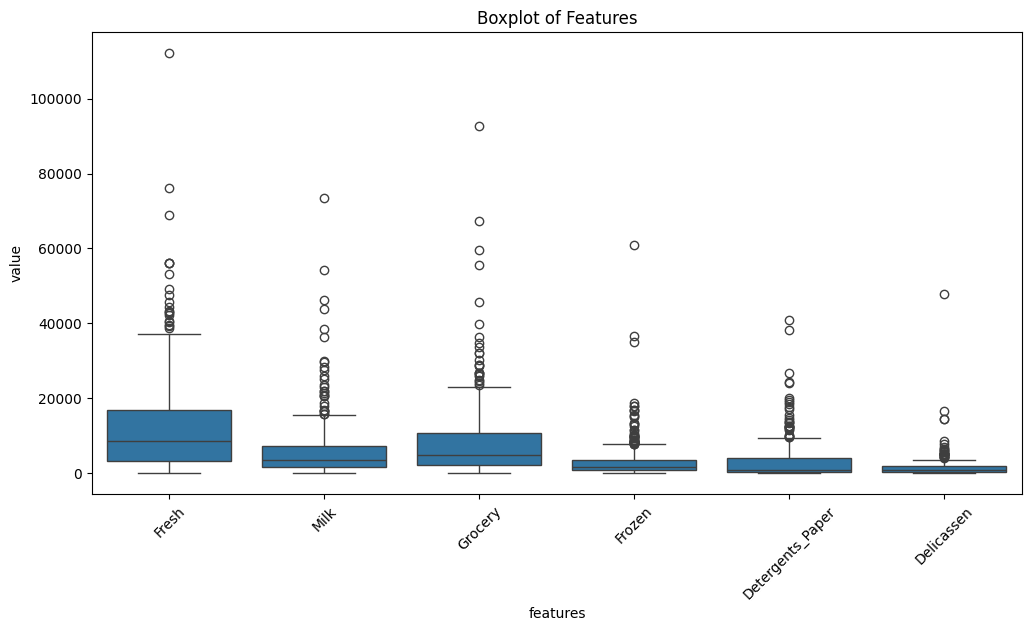

In [ ]:
plt.figure(figsize=(12,6))
df_melted = df.melt(var_name="features", value_name="value")
sns.boxplot(x="features", y="value", data=df_melted)
plt.xticks(rotation=45)
plt.title("Boxplot of Features")
plt.show()

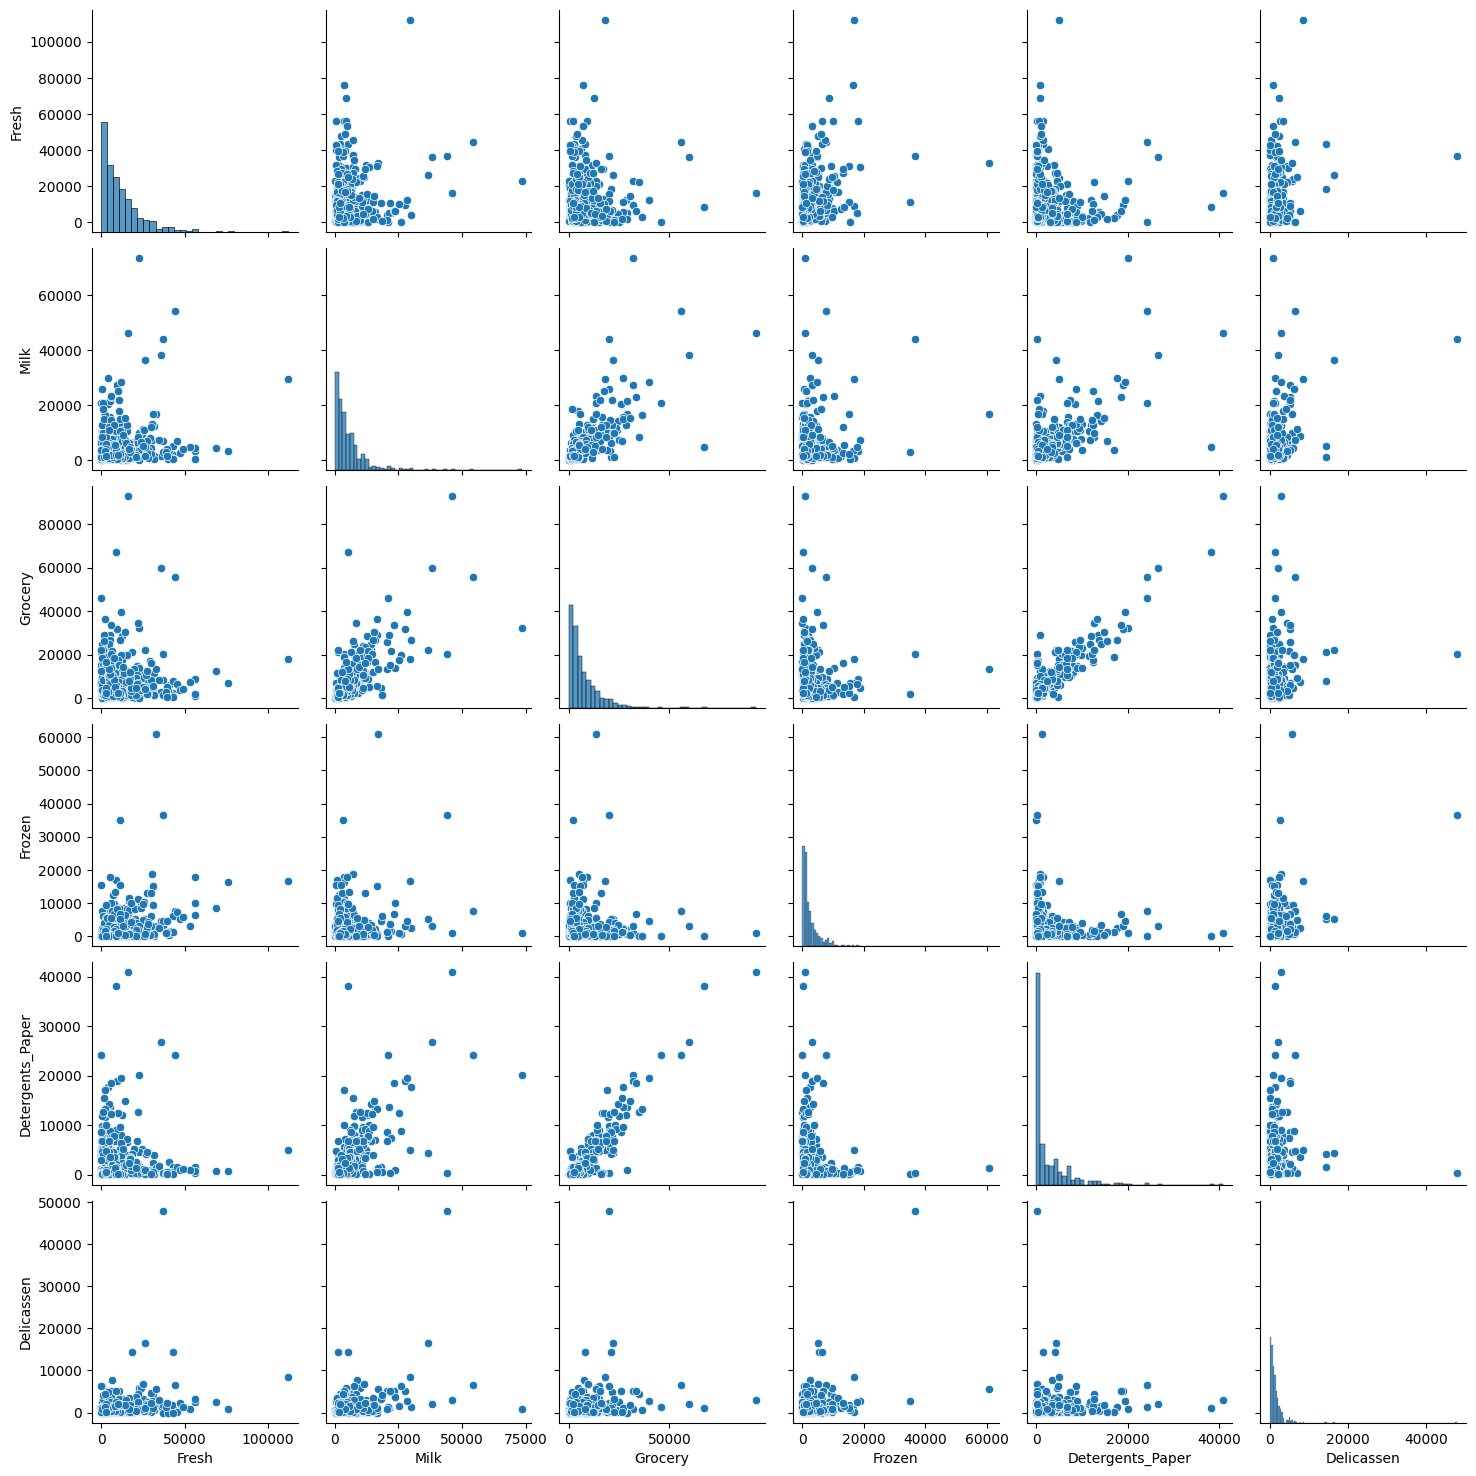

In [ ]:
sns.pairplot(df)
plt.show()

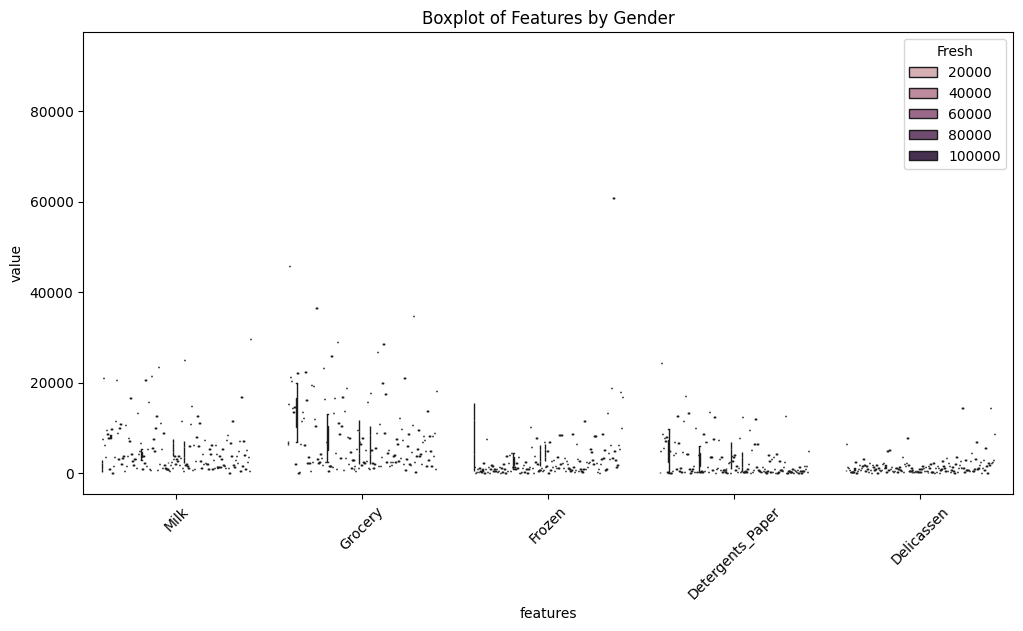

In [ ]:
plt.figure(figsize=(12, 6))
df_melted = df.melt(id_vars=["Fresh"], var_name="features", value_name="value")
sns.boxplot(x="features", y="value", hue="Fresh", data=df_melted)
plt.xticks(rotation=45)
plt.title("Boxplot of Features by Gender")
plt.show()

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df[['Fresh', 'Milk']])
labels = kmeans.labels_
df['Cluster'] = labels

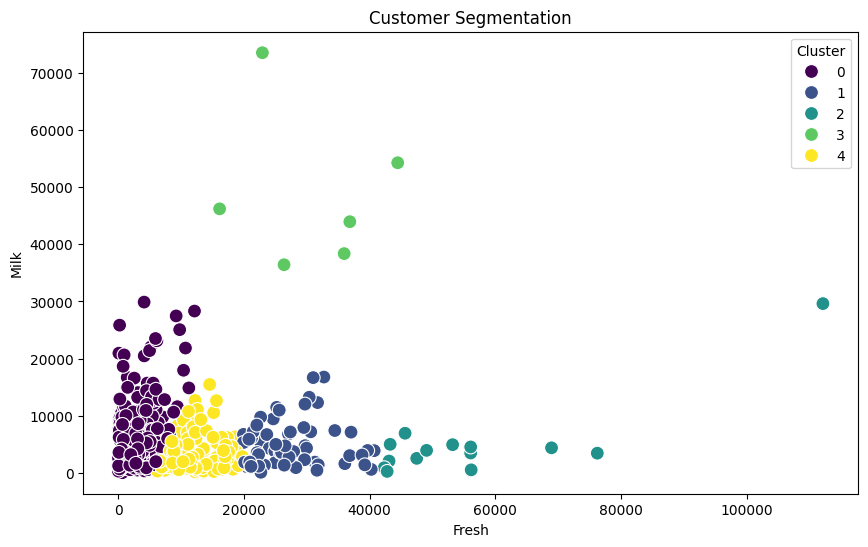

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Fresh'], y=df['Milk'], hue=df['Cluster'], palette='viridis', s=100)
plt.title("Customer Segmentation")
plt.xlabel("Fresh")
plt.ylabel("Milk")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
X = df.drop(columns=['Cluster'])
y = df['Cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=42)

In [ ]:
cluster_labels = kmeans.labels_
print(cluster_labels)

[4 4 4 4 1 4 4 4 4 0 0 4 1 1 1 4 0 4 1 4 1 4 1 2 1 1 4 4 0 1 1 4 1 1 4 0 1
 0 0 3 1 1 0 0 4 0 0 2 4 0 4 4 1 0 1 4 0 0 4 4 4 2 4 0 4 2 4 1 4 4 1 1 4 1
 4 1 4 0 4 4 4 0 0 1 4 2 2 3 4 1 4 4 2 4 0 4 4 4 4 4 0 0 4 3 4 1 0 0 4 0 4
 0 1 4 1 4 4 4 1 4 1 4 4 4 1 3 1 1 4 1 4 4 4 4 4 4 4 4 4 4 1 1 1 4 1 0 4 4
 4 1 1 4 1 4 4 0 0 1 4 0 0 4 4 0 4 0 4 4 4 4 0 0 4 0 4 0 3 4 4 4 4 3 0 3 4
 4 4 4 0 0 1 4 4 0 4 1 1 0 4 4 0 0 1 4 4 0 4 4 4 0 1 2 4 4 0 0 0 1 0 4 4 0
 4 4 4 4 1 4 4 4 4 4 1 4 1 4 4 1 4 3 1 1 1 4 0 0 4 4 1 4 4 2 4 1 4 1 4 4 3
 3 4 4 1 4 0 0 0 1 0 4 4 4 4 1 4 4 1 4 4 1 4 4 3 1 3 1 4 1 1 1 4 4 4 0 1 4
 1 4 4 4 1 0 4 0 0 0 0 1 4 0 4 1 0 4 4 0 4 4 4 0 4 4 1 4 1 3 4 4 1 4 4 0 1
 2 1 1 4 4 4 4 4 0 4 0 4 4 0 1 4 0 4 0 4 0 4 4 1 0 4 4 1 4 4 4 4 4 4 4 1 4
 1 1 4 1 4 4 0 1 4 4 1 1 1 4 0 4 4 1 4 4 4 4 4 1 4 4 0 4 4 4 4 1 1 1 1 4 1
 0 4 4 4 4 0 4 4 4 0 4 0 4 0 1 1 1 1 4 0 1 4 4 0 4 1 4 1 1 1 0 4 4]


In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8787878787878788

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92        58
           1       0.86      0.75      0.80        16
           2       1.00      0.67      0.80         6
           4       0.85      0.88      0.87        52

    accuracy                           0.88       132
   macro avg       0.90      0.81      0.85       132
weighted avg       0.88      0.88      0.88       132


Confusion Matrix:
 [[54  0  0  4]
 [ 0 12  0  4]
 [ 0  2  4  0]
 [ 6  0  0 46]]
